# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Marlina
- **Email:** marlinausman31@gmail.com
- **ID Dicoding:** theonlylina

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara musim dan jumlah sewa sepeda harian? Apakah terdapat pola perubahan jumlah sewa sepeda harian yang dapat dikaitkan dengan perubahan musim?
- Apakah ada pola atau tren yang dapat diamati dalam jumlah sewa sepeda harian berdasarkan waktu, baik itu dalam skala bulan maupun jam?
- Bagaimana cuaca (weathersit) mempengaruhi jumlah sewa sepeda harian? Adakah hubungan antara kondisi cuaca tertentu dan tingkat permintaan sepeda harian?
- Apakah ada perbedaan signifikan dalam jumlah sewa sepeda harian antara hari kerja (workingday) dan hari libur (holiday)?

## Import Semua Packages/Library yang Digunakan

In [78]:
#import packages yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

## Data Wrangling

### Gathering Data

In [79]:
# Read dataset
df_hour = pd.read_csv("Bike-sharing-dataset/hour.csv", delimiter=",")
print(df_hour.shape)
df_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [80]:
# Read dataset
df_day = pd.read_csv("Bike-sharing-dataset/day.csv", delimiter=",")
print(df_day.shape)
df_day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
# Menghitung jumlah baris setiap DataFrame
print("Jumlah baris di DataFrame day:", df_day.shape[0])
print("Jumlah baris di DataFrame hour:", df_hour.shape[0])

Jumlah baris di DataFrame day: 731
Jumlah baris di DataFrame hour: 17379


In [82]:
# Menggabungkan DataFrames df_day dan df_hour berdasarkan kolom 'dteday'
bike_sharing = df_day.merge(df_hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))

# Mengecek shape dari DataFrame yang telah digabungkan
print("Shape of the merged DataFrame:", bike_sharing.shape)

# Mengecek apakah terdapat baris dengan nilai 'dteday' yang kosong
missing_dates = bike_sharing.loc[bike_sharing["dteday"].isnull()]

# Menampilkan beberapa baris pertama dari DataFrame yang telah digabungkan
bike_sharing.head()

Shape of the merged DataFrame: (17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [83]:
# Menampilkan informasi di dalam dataset
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [84]:
# Menampilkan informasi di dalam dataset
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [85]:
# Menampilkan informasi di dalam dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

In [86]:
# Menampilkan tipe data pada atribut dalam dataset
bike_sharing.dtypes

instant_daily          int64
dteday                object
season_daily           int64
yr_daily               int64
mnth_daily             int64
holiday_daily          int64
weekday_daily          int64
workingday_daily       int64
weathersit_daily       int64
temp_daily           float64
atemp_daily          float64
hum_daily            float64
windspeed_daily      float64
casual_daily           int64
registered_daily       int64
cnt_daily              int64
instant_hourly         int64
season_hourly          int64
yr_hourly              int64
mnth_hourly            int64
hr                     int64
holiday_hourly         int64
weekday_hourly         int64
workingday_hourly      int64
weathersit_hourly      int64
temp_hourly          float64
atemp_hourly         float64
hum_hourly           float64
windspeed_hourly     float64
casual_hourly          int64
registered_hourly      int64
cnt_hourly             int64
dtype: object

In [87]:
# Menampilkan nama atribut(kolom) dalam dataset
bike_sharing.columns

Index(['instant_daily', 'dteday', 'season_daily', 'yr_daily', 'mnth_daily',
       'holiday_daily', 'weekday_daily', 'workingday_daily',
       'weathersit_daily', 'temp_daily', 'atemp_daily', 'hum_daily',
       'windspeed_daily', 'casual_daily', 'registered_daily', 'cnt_daily',
       'instant_hourly', 'season_hourly', 'yr_hourly', 'mnth_hourly', 'hr',
       'holiday_hourly', 'weekday_hourly', 'workingday_hourly',
       'weathersit_hourly', 'temp_hourly', 'atemp_hourly', 'hum_hourly',
       'windspeed_hourly', 'casual_hourly', 'registered_hourly', 'cnt_hourly'],
      dtype='object')

In [88]:
# Memeriksa data null dalam dataset
bike_sharing.isnull().sum()

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

Tidak terdapat data missing value pada setiap kolom

In [89]:
# Memeriksa data duplikat dalam dataset
bike_sharing.duplicated().sum()

0

In [90]:
# Menampilkan 5 data teratas dalam dataset
bike_sharing.head(5)

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [91]:
# Menampilkan 5 data terbawah dalam dataset
bike_sharing.tail(5)

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [92]:
# Menampilkan ringkasan statistik untuk dataset bike_sharing
bike_sharing.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


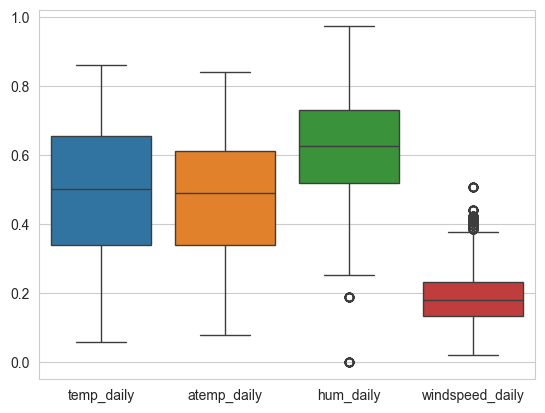

In [93]:
# Menampilkan outlier pada beberapa atribut di dalam dataset bike_sharing dengan menggunakan boxplot
sns.boxplot(data=bike_sharing[['temp_daily', 'atemp_daily', 'hum_daily', 'windspeed_daily']])
plt.show()

### Cleaning Data

Semua tipe data telah diverifikasi dan tidak ditemukan adanya ketidaksesuaian atau masalah.

## Exploratory Data Analysis (EDA)

In [94]:
# Mendefinisikan fungsi yang akan digunakan untuk EDA
def calculate_range(series):
    return series.max() - series.min()

In [95]:
# Menampilkan ringkasan statistik untuk semua kolom dalam dataset bike_sharing, termasuk deskripsi statistik untuk kolom kategorikal.
bike_sharing.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore ...

In [96]:
# Grup berdasarkan musim_hourly dan melakukan beberapa agregasi pada kolom-kolom tertentu
bike_sharing.groupby(by="season_hourly").agg({
    "workingday_hourly": "count",  # Jumlah penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False)


workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
3                          4496           0.8507  0.0  0.171593     0.8507
2                          4409           0.7164  0.0  0.203410     0.7164
1                          4242           0.8060  0.0  0.215107     0.8060
4                          4232           0.6418  0.0  0.170819     0.6418

In [97]:
# Grup berdasarkan musim_daily dan melakukan beberapa agregasi pada kolom-kolom tertentu
bike_sharing.groupby(by="season_daily").agg({
    "workingday_daily": "count",  # Jumlah penyewa pada hari kerja berdasarkan musim
    "windspeed_daily": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi kustom untuk range
}).sort_values(by=("workingday_daily", "count"), ascending=False)


workingday_daily windspeed_daily                               
                        count             max       min      mean <lambda_0>
season_daily                                                                
3                        4496        0.375617  0.064071  0.171593   0.311546
2                        4409        0.388067  0.065929  0.203410   0.322138
1                        4242        0.507463  0.045408  0.215107   0.462055
4                        4232        0.422275  0.022392  0.170819   0.399883

In [98]:
# Grup berdasarkan musim_daily dan menghitung jumlah nilai unik dalam kolom 'mnth_daily'
bike_sharing.groupby(by="season_daily")["mnth_daily"].nunique()

season_daily
1    4
2    4
3    4
4    4
Name: mnth_daily, dtype: int64

In [99]:
# Grup berdasarkan musim_daily dan menghitung jumlah nilai unik dalam kolom 'instant_daily'
bike_sharing.groupby(by="season_daily")["instant_daily"].nunique()

season_daily
1    181
2    184
3    188
4    178
Name: instant_daily, dtype: int64

In [100]:
# Grup berdasarkan musim_daily dan menghitung jumlah nilai unik dalam kolom 'cnt_daily'
bike_sharing.groupby(by="season_daily")["cnt_daily"].nunique()

season_daily
1    179
2    182
3    188
4    176
Name: cnt_daily, dtype: int64

In [101]:
# Grup berdasarkan musim_daily dan menghitung jumlah nilai unik dalam kolom 'cnt_hourly'
bike_sharing.groupby(by="season_daily")["cnt_hourly"].nunique()

season_daily
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

In [102]:
# Grup berdasarkan weathersit_daily dan menghitung jumlah nilai unik dalam kolom 'cnt_hourly'
bike_sharing.groupby(by="weathersit_daily")["cnt_hourly"].nunique()

weathersit_daily
1    841
2    686
3    187
Name: cnt_hourly, dtype: int64

In [103]:
# Grup berdasarkan weathersit_daily dan menghitung jumlah nilai unik dalam kolom 'cnt_daily'
bike_sharing.groupby(by="weathersit_daily")["cnt_daily"].nunique()

weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64

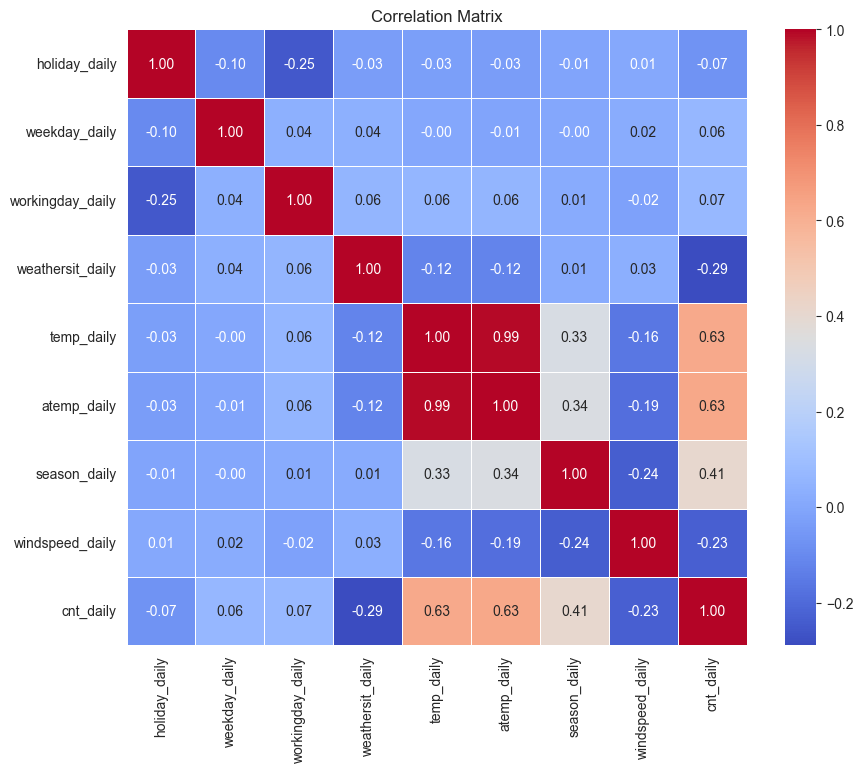

In [104]:
# Memilih kolom numerik untuk korelasi
numerical_columns = [
    "holiday_daily", "weekday_daily", "workingday_daily", "weathersit_daily",
    "temp_daily", "atemp_daily", "season_daily", "windspeed_daily", "cnt_daily"
]

# Ekstraksi matriks korelasi
correlation = bike_sharing[numerical_columns].corr()

# Membuat heatmap untuk visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Jumlah penyewa sepeda memiliki hubungan yang negatif terhadap holiday, weathersit, dan windspeed

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana hubungan antara musim dan jumlah sewa sepeda harian? Apakah terdapat pola perubahan jumlah sewa sepeda harian yang dapat dikaitkan dengan perubahan musim?


C:\Users\Asus\AppData\Local\Temp\ipykernel_23444\4042004760.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_names, y=seasonal_data, palette="viridis")


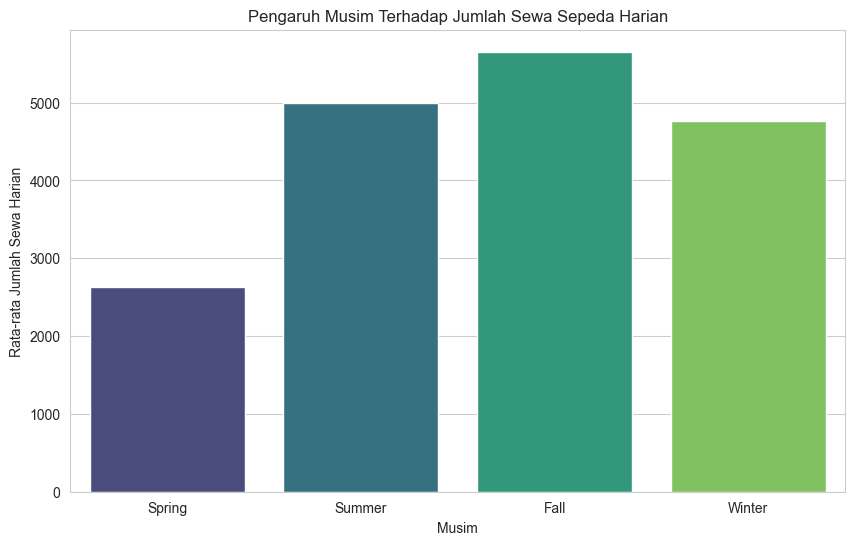

In [105]:
# Menghitung rata-rata jumlah sewa harian berdasarkan musim
seasonal_data = bike_sharing.groupby('season_daily')['cnt_daily'].mean().reindex(index=[1, 2, 3, 4])

# Menetapkan nama musim
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

# Membuat plot bar dengan menggunakan seaborn untuk peningkatan estetika
plt.figure(figsize=(10, 6))
sns.barplot(x=season_names, y=seasonal_data, palette="viridis")
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

Dari diagram tersebut, terlihat bahwa peminjaman sepeda mencapai puncaknya selama musim gugur(Fall).

### Pertanyaan 2:

Apakah ada pola atau tren yang dapat diamati dalam jumlah sewa sepeda harian berdasarkan waktu, baik itu dalam skala bulan maupun jam?

C:\Users\Asus\AppData\Local\Temp\ipykernel_23444\3483264425.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="mnth_daily", y="cnt_daily", data=bike_sharing, ci=None, marker='o', color='skyblue', linestyle='-', linewidth=2)


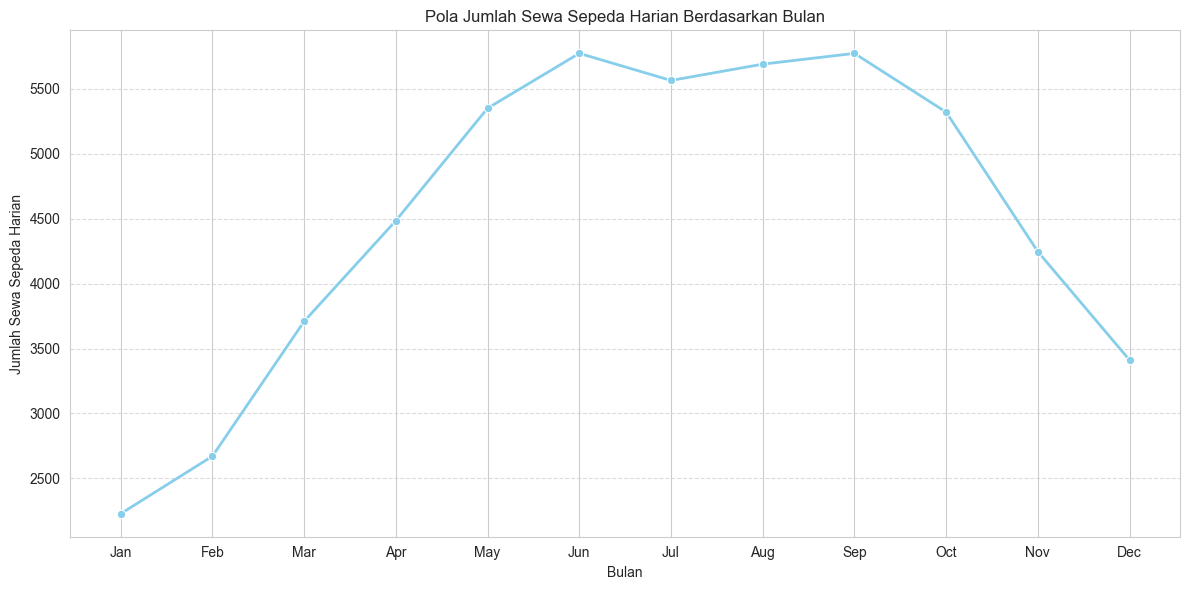

In [106]:
# Pola berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x="mnth_daily", y="cnt_daily", data=bike_sharing, ci=None, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23444\4206907886.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt_hourly", data=bike_sharing, ci=None, marker='o', color='salmon', linestyle='-', linewidth=2)


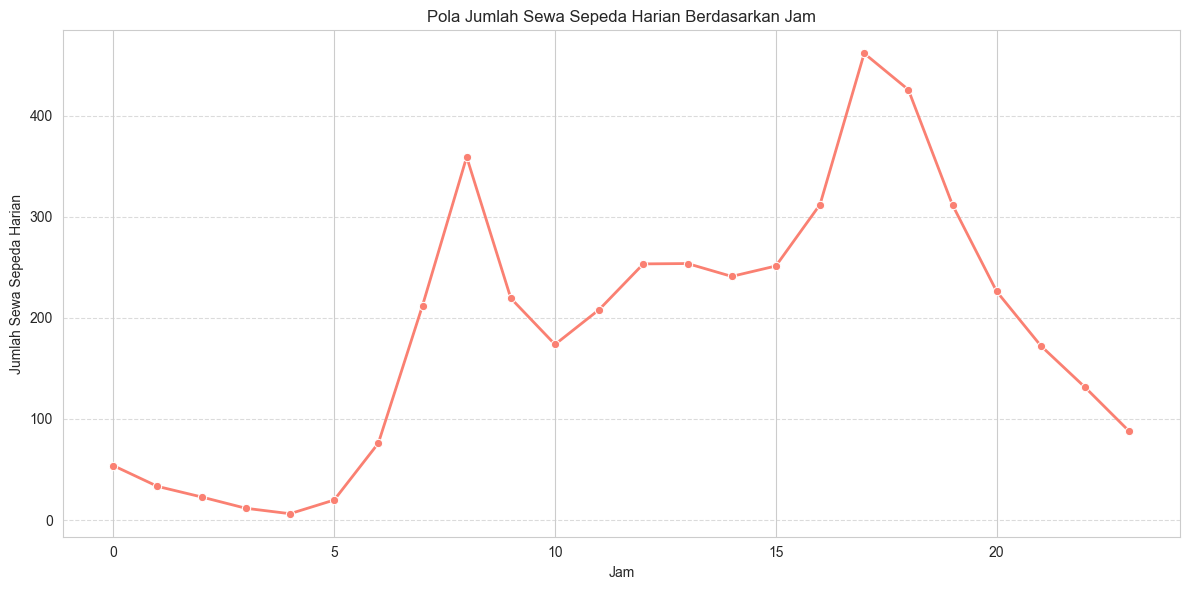

In [107]:
# Pola berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=bike_sharing, ci=None, marker='o', color='salmon', linestyle='-', linewidth=2)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pada kedua grafik tersebut, terlihat bahwa aktivitas penyewaan sepeda mencapai puncaknya pada bulan Juni dan September. Selain itu, dari analisis jam, terungkap bahwa jumlah sewa sepeda mengalami peningkatan yang signifikan sekitar pukul 8 pagi dan pukul 5 atau 6 sore.

## Pertanyaan 3:

Bagaimana cuaca (weathersit) mempengaruhi jumlah sewa sepeda harian? Adakah hubungan antara kondisi cuaca tertentu dan tingkat permintaan sepeda harian?

C:\Users\Asus\AppData\Local\Temp\ipykernel_23444\1930170249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit_daily", y="cnt_daily", data=bike_sharing, palette="viridis")


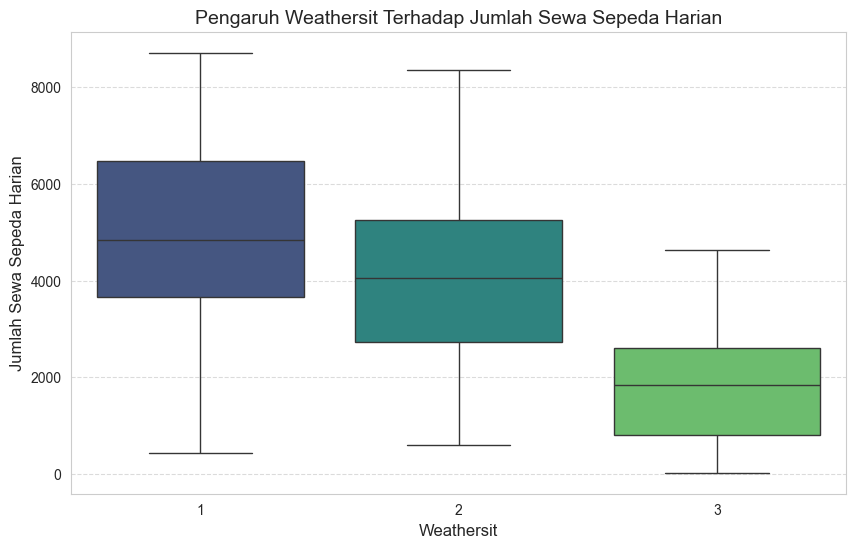

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat boxplot dengan seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit_daily", y="cnt_daily", data=bike_sharing, palette="viridis")

# Menambahkan label dan judul
plt.title("Pengaruh Weathersit Terhadap Jumlah Sewa Sepeda Harian", fontsize=14)
plt.xlabel("Weathersit", fontsize=12)
plt.ylabel("Jumlah Sewa Sepeda Harian", fontsize=12)

# Menampilkan plot dengan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Peminjaman sepeda meningkat saat kondisi cuaca cerah, sedikit berawan, atau berawan sebagian.

## Pertanyaan 4:

Apakah ada perbedaan signifikan dalam jumlah sewa sepeda harian antara hari kerja (workingday) dan hari libur (holiday)?

C:\Users\Asus\AppData\Local\Temp\ipykernel_23444\4031533419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_sharing, palette=colors, width=0.5)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23444\4031533419.py:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_sharing, palette=colors, width=0.5)


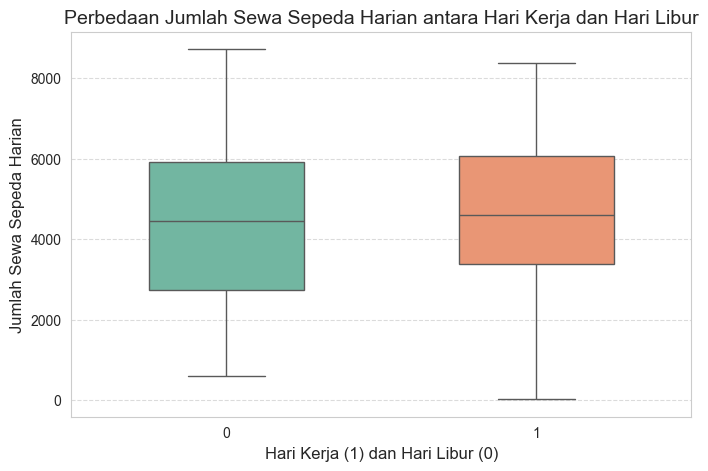

In [109]:
# Pemilihan palet warna
colors = sns.color_palette("Set2")

# Membuat boxplot dengan seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_sharing, palette=colors, width=0.5)

# Menambahkan label dan judul
plt.title("Perbedaan Jumlah Sewa Sepeda Harian antara Hari Kerja dan Hari Libur", fontsize=14)
plt.xlabel("Hari Kerja (1) dan Hari Libur (0)", fontsize=12)
plt.ylabel("Jumlah Sewa Sepeda Harian", fontsize=12)

# Menampilkan plot dengan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Dari boxplot ini, terlihat bahwa jumlah sewa sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur.

## Conclusion

- Conclution pertanyaan 1: Hubungan antara musim dan jumlah sewa sepeda harian
    - Dari grafik, terlihat bahwa peminjaman sepeda mencapai puncaknya selama musim gugur (Fall).

- Conclution pertanyaan 2: Pola atau tren dalam jumlah sewa sepeda harian berdasarkan waktu
    - Grafik bulan menunjukkan bahwa aktivitas penyewaan sepedaa mencapai puncaknya pada bulan Juni dan September.
    - Analisis jam menunjukkan peningkatan signifikan pada jam 8 pagi dan 5 - 6 sore.
    - Kesimpulan: Ada pola musiman yang terlihat dengan peminjaman sepeda yang lebih tinggi di bulan-bulan tertentu dan peningkatan selama jam sibuk di pagi dan sore hari.

- Conclution pertanyaan 3: Pengaruh cuaca(Weathersit) terhadap jumlah sewa sepeda harian
    - Peminjaman sepeda meningkat pada kondisi cuaca cerah, sedikit berawan, atau berawan sebagian.
    - Kesimpulan: Cuaca yang lebih cerah atau berawan memiliki hubungan positif dengan permintaan sepeda harian.
- Conclution pertanyaan 4: Perbedaan antara hari kerja dan hari libur dalam jumlah sewa sepeda harian
    - Dari boxplot, terlihat bahwa jumlah sewa sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur.
    - Kesimpulan: Terdapat perbedaan signifikan dalam jumlah sewa sepeda harian antara hari kerja libur, dengan jumlah sewa sepeda lebih tinggi pada hari kerja
